In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from time import time
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score as f1_score_rep
from sklearn.metrics import accuracy_score

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

2024-03-05 21:53:18.329366: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 21:53:18.356741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 21:53:18.356779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 21:53:18.357433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 21:53:18.361830: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 21:53:18.362485: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

input_shape = x_train.shape[1:]

num_classes = len(np.unique(y_train))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=3, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(learning_rate=0.01) 

cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = cnn_model.fit(x_train, y_train, epochs=50, batch_size=64,
                     validation_data=(x_val, y_val), 
                     callbacks=[early_stopping])

from joblib import dump, load
dump(hist, "/home/jovyan/X-IIoTID/pre_train/CNN.joblib")


2024-03-05 21:53:20.089304: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
7012/7012 [==============================] - 12s 2ms/step - loss: 0.6708 - accuracy: 0.8145 - val_loss: 0.4025 - val_accuracy: 0.8913
Epoch 2/50
7012/7012 [==============================] - 11s 2ms/step - loss: 0.3233 - accuracy: 0.9070 - val_loss: 0.2900 - val_accuracy: 0.9190
Epoch 3/50
7012/7012 [==============================] - 12s 2ms/step - loss: 0.2448 - accuracy: 0.9278 - val_loss: 0.2270 - val_accuracy: 0.9343
Epoch 4/50
7012/7012 [==============================] - 12s 2ms/step - loss: 0.2074 - accuracy: 0.9371 - val_loss: 0.2007 - val_accuracy: 0.9395
Epoch 5/50
7012/7012 [==============================] - 11s 2ms/step - loss: 0.1827 - accuracy: 0.9461 - val_loss: 0.1653 - val_accuracy: 0.9532
Epoch 6/50
7012/7012 [==============================] - 11s 2ms/step - loss: 0.1653 - accuracy: 0.9519 - val_loss: 0.1537 - val_accuracy: 0.9558
Epoch 7/50
7012/7012 [==============================] - 11s 2ms/step - loss: 0.1487 - accuracy: 0.9559 - val_loss: 0.1395 - val_ac

4383/4383 [==============================] - 4s 842us/step
FPR: [8.02555950e-04 8.80710296e-04 7.15251304e-06 6.63330361e-05
 6.62724682e-05 0.00000000e+00 1.07747010e-04 8.28552258e-03
 6.83476765e-04 2.13967819e-05 1.43844533e-05 4.27522842e-02
 9.61515348e-05 1.42829597e-05 6.19833168e-04 1.78817942e-04
 5.70861787e-05 4.99996429e-05 7.28422310e-06]
TPR: [0.99840392 0.82807018 0.97136038 0.56910569 0.99954823 0.8
 0.89852217 0.99446567 0.99399183 0.04545455 0.98740554 0.99758737
 0.99805536 0.7635468  0.80594654 0.66903073 0.93406593 0.23580786
 0.99932134]
FNR: [1.59608427e-03 1.71929825e-01 2.86396181e-02 4.30894309e-01
 4.51773210e-04 2.00000000e-01 1.01477833e-01 5.53432600e-03
 6.00817111e-03 9.54545455e-01 1.25944584e-02 2.41263433e-03
 1.94464251e-03 2.36453202e-01 1.94053456e-01 3.30969267e-01
 6.59340659e-02 7.64192140e-01 6.78656261e-04]
TNR: [0.99919744 0.99911929 0.99999285 0.99993367 0.99993373 1.
 0.99989225 0.99171448 0.99931652 0.9999786  0.99998562 0.95724772
 0.999

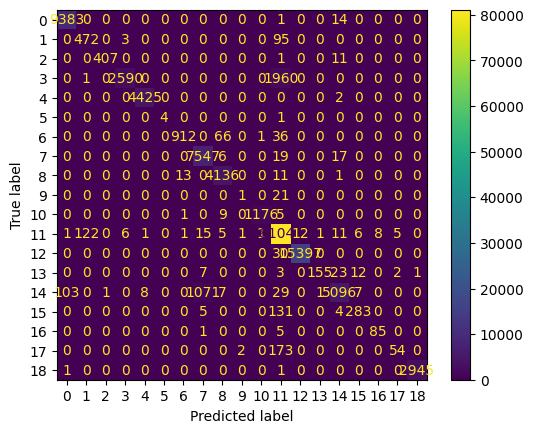

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score

test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = cnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_hat, average='macro')
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='macro')
auc = roc_auc_score(y_test, cnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()